In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

util_scale = pd.read_csv('/content/drive/My Drive/data/2022_utility-scale_solar.csv')
util_scale.head()

,EIA ID,Project Name,Solar COD,Solar COD Year,Region,State,Latitude,Longitude,Avg GHI,Solar Tech Main,...,2013 Capacity Factor,2014 Capacity Factor,2015 Capacity Factor,2016 Capacity Factor,2017 Capacity Factor,2018 Capacity Factor,2019 Capacity Factor,2020 Capacity Factor,2021 Capacity Factor,FIPS
0,10437ret,Solar Energy Generating Systems (SEGS) II OLD ...,12/31/84,1984,CAISO,CA,34.86,-116.83,5.85,CSP,...,7.80%,7.10%,10.40%,NaN,NaN,NaN,NaN,NaN,NaN,6071
1,10438ret,Solar Energy Generating Systems (SEGS) I OLD (...,12/31/85,1985,CAISO,CA,34.87,-116.83,5.85,CSP,...,8.80%,2.90%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6071
2,10439,Solar Energy Generating Systems (SEGS) III,12/31/86,1986,CAISO,CA,35.01,-117.56,5.95,CSP,...,19.00%,18.20%,17.40%,15.50%,14.70%,14.60%,12.80%,NaN,NaN,6071
3,10440,Solar Energy Generating Systems (SEGS) IV,12/31/86,1986,CAISO,CA,35.01,-117.56,5.95,CSP,...,19.50%,18.10%,17.70%,16.30%,14.40%,14.80%,14.00%,NaN,NaN,6071
4,10441,Solar Energy Generating Systems (SEGS) V,10/31/87,1987,CAISO,CA,35.02,-117.56,5.95,CSP,...,19.30%,18.80%,17.60%,16.70%,14.70%,15.80%,13.80%,NaN,NaN,6071


In [ ]:
county_temp = pd.read_csv('/content/drive/My Drive/data/county_temp_by_month_fips.csv')
county_temp.head()

,FIPS,AVG Jan,AVG Feb,AVG Mar,AVG Apr,AVG May,AVG June,AVG July,AVG August,AVG September,AVG October,AVG November,AVG December
0,1001,47.31,53.27,59.57,64.39,72.52,79.09,81.92,81.32,77.34,67.08,55.59,51.22
1,1003,52.09,57.18,63.42,67.10,74.53,80.42,82.49,82.08,78.73,70.26,60.10,56.29
2,1005,48.59,54.62,60.56,64.78,72.50,78.73,81.24,80.64,76.81,67.74,56.83,52.21
3,1007,45.36,50.83,57.46,62.56,70.88,77.47,80.63,79.87,75.76,65.59,54.10,NaN
4,1009,43.48,48.80,55.48,61.42,69.97,76.84,80.00,78.84,74.60,64.43,52.62,48.04


In [ ]:
'''
USED TO CREATE FIPS COLUMN

import requests
import urllib

new_column = []

for index, row in util_scale.iterrows():
  lng = util_scale["Longitude"][index]
  lat = util_scale["Latitude"][index]
  print(index)

  URL = f"https://geocoding.geo.census.gov/geocoder/geographies/coordinates?x={lng}&y={lat}&benchmark=4&vintage=423&format=json"
  response = requests.get(URL).json()
  county_data = response["result"]["geographies"]["Counties"][0]
  fip_code = str(county_data["STATE"]) + str(county_data["COUNTY"])

  new_column.append(fip_code)

util_scale["FIPS"] = new_column
util_scale.head()
'''

'\nUSED TO ADD FIPS COLUMN\n\nimport requests\nimport urllib\n\nnew_column = []\n\nfor index, row in util_scale.iterrows():\n  lng = util_scale["Longitude"][index]\n  lat = util_scale["Latitude"][index]\n  print(index)\n\n  URL = f"https://geocoding.geo.census.gov/geocoder/geographies/coordinates?x={lng}&y={lat}&benchmark=4&vintage=423&format=json"\n  response = requests.get(URL).json()\n  county_data = response["result"]["geographies"]["Counties"][0]\n  fip_code = str(county_data["STATE"]) + str(county_data["COUNTY"])\n\n  new_column.append(fip_code)\n\nutil_scale["FIPS"] = new_column\nutil_scale.head()\n'

In [ ]:
'''
USED TO DOWNLOAD CSV OF NEW DF

from google.colab import files

util_scale.to_csv('2022_utility-scale_solar_FIPS.csv', index=False)
files.download('2022_utility-scale_solar_FIPS.csv')
'''

"\nUSED TO DOWNLOAD CSV OF NEW DF\n\nfrom google.colab import files\n\nutil_scale.to_csv('2022_utility-scale_solar_FIPS.csv', index=False)\nfiles.download('2022_utility-scale_solar_FIPS.csv')\n"

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the CSV file into a DataFrame
df_statesolar = pd.read_csv('/content/drive/My Drive/data/statesolarmarketpenetration.csv')

# Select the necessary columns and rename them
df_statesolar = df_statesolar.iloc[:, :5]  # Selecting the first 5 columns
column_names = [
    'State', 'Solar generation as a % of in-state generation',
    'Utility-Scale Solar Only (Generation %)', 'Solar generation as a % of in-state load',
    'Utility-Scale Solar Only (Load %)'
]
df_statesolar.columns = column_names

# Drop rows with NaN values
df_statesolar = df_statesolar.dropna()

# Reset index
df_statesolar.reset_index(drop=True, inplace=True)

# Convert percentage strings to floats
percentage_columns = ['Solar generation as a % of in-state generation', 'Utility-Scale Solar Only (Generation %)',
                      'Solar generation as a % of in-state load', 'Utility-Scale Solar Only (Load %)']
for column in percentage_columns:
    df_statesolar[column] = df_statesolar[column].str.rstrip('%').astype('float') / 100

# Define the target variable based on a threshold
threshold = 0.1  # Adjust this threshold as needed
df_statesolar['High_Solar_Penetration'] = df_statesolar['Solar generation as a % of in-state generation'].apply(lambda x: 1 if x > threshold else 0)

# Define features and target variable
features = ['Solar generation as a % of in-state generation',
            'Utility-Scale Solar Only (Generation %)',
            'Solar generation as a % of in-state load',
            'Utility-Scale Solar Only (Load %)']
target = 'High_Solar_Penetration'

# Split the data into training and testing sets
X = df_statesolar[features]
y = df_statesolar[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data preprocessing: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5


Confusion Matrix:
[[3 0]
 [0 2]]


In [ ]:
# Load the CSV file into a DataFrame
df_statesolar = pd.read_csv('/content/drive/My Drive/data/statesolarmarketpenetration.csv')

# Select the necessary columns and rename them
df_statesolar = df_statesolar.iloc[:, :5]  # Selecting the first 5 columns
column_names = [
    'State', 'Solar generation as a % of in-state generation',
    'Utility-Scale Solar Only (Generation %)', 'Solar generation as a % of in-state load',
    'Utility-Scale Solar Only (Load %)'
]
df_statesolar.columns = column_names

# Drop rows with NaN values
df_statesolar = df_statesolar.dropna()

# Remove the percentage symbol from the columns containing percentage values
columns_to_clean = ['Solar generation as a % of in-state generation',
                    'Utility-Scale Solar Only (Generation %)',
                    'Solar generation as a % of in-state load',
                    'Utility-Scale Solar Only (Load %)']

for column in columns_to_clean:
    df_statesolar[column] = df_statesolar[column].str.rstrip('%').astype(float)

# Define the target variable based on a threshold
threshold = 10  # Adjust this threshold as needed
df_statesolar['High_Solar_Penetration'] = df_statesolar['Solar generation as a % of in-state generation'].apply(lambda x: 1 if x > threshold else 0)

# Define features and target variable
features = ['Solar generation as a % of in-state generation', 'Utility-Scale Solar Only (Generation %)', 'Solar generation as a % of in-state load', 'Utility-Scale Solar Only (Load %)']  # Add other relevant features
target = 'High_Solar_Penetration'  # Define the target variable

# Split the data into training and testing sets
X = df_statesolar[features]
y = df_statesolar[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data preprocessing: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the RandomForestClassifier
rf_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5


Confusion Matrix:
[[3 0]
 [0 2]]


In [ ]:
phoenix_ghi_ts = pd.read_csv('/content/drive/My Drive/data/323705_33.45_-112.06_tmy-2021.csv', skiprows=2)
print(phoenix_ghi_ts['Year'].unique())


phoenix_ghi_ts.head()

[2010 2001 2013 2015 2018 2002 2006 2008 2004]


,Year,Month,Day,Hour,Minute,GHI,Temperature
0,2010,1,1,0,30,0,3.9
1,2010,1,1,1,30,0,3.8
2,2010,1,1,2,30,0,3.9
3,2010,1,1,3,30,0,3.9
4,2010,1,1,4,30,0,3.8


In [ ]:
df_cleaned = phoenix_ghi_ts.drop(index=[0, 1]).reset_index(drop=True)

df_cleaned.columns = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'GHI', 'Temperature']

df_cleaned['Datetime'] = pd.to_datetime(df_cleaned[['Year', 'Month', 'Day', 'Hour', 'Minute']])

df_cleaned['GHI'] = pd.to_numeric(df_cleaned['GHI'], errors='coerce')

df_cleaned = df_cleaned.dropna(subset=['GHI'])

df_daily_ghi = df_cleaned.groupby(df_cleaned['Datetime'].dt.date)['GHI'].mean().reset_index()
df_daily_ghi['Datetime'] = pd.to_datetime(df_daily_ghi['Datetime'])

df_daily_ghi.head()

,Datetime,GHI
0,2001-02-01,190.583333
1,2001-02-02,186.375000
2,2001-02-03,175.333333
3,2001-02-04,190.791667
4,2001-02-05,193.208333


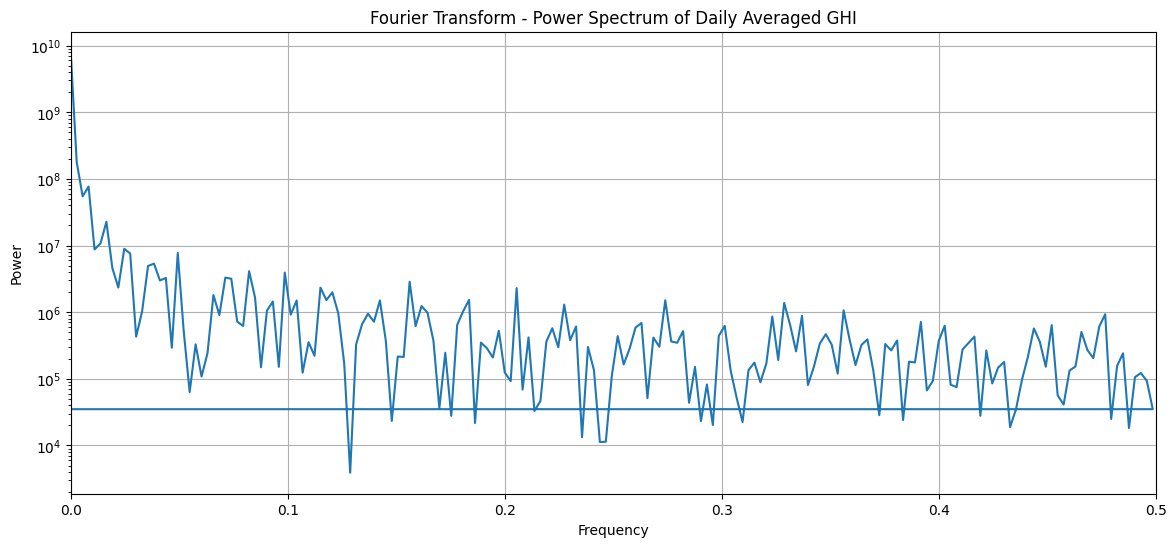

In [ ]:
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

ghi_fft = fft(df_daily_ghi['GHI'].values)

power_spectrum = np.abs(ghi_fft)**2

freq = np.fft.fftfreq(df_daily_ghi['GHI'].size, d=1)

plt.figure(figsize=(14, 6))
plt.plot(freq, power_spectrum)
plt.title('Fourier Transform - Power Spectrum of Daily Averaged GHI')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.yscale('log')
plt.grid(True)
plt.xlim(0, 0.5)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_daily_ghi['GHI'])

adf_output = {
    'Test Statistic': adf_result[0],
    'p-value': adf_result[1],
    'Number of Lags Used': adf_result[2],
    'Number of Observations Used': adf_result[3],
    'Critical Values': adf_result[4],
}

adf_output

{'Test Statistic': -2.435701578693906,
 'p-value': 0.13191234463069257,
 'Number of Lags Used': 5,
 'Number of Observations Used': 359,
 'Critical Values': {'1%': -3.4486972813047574,
  '5%': -2.8696246923288418,
  '10%': -2.571077032068342}}

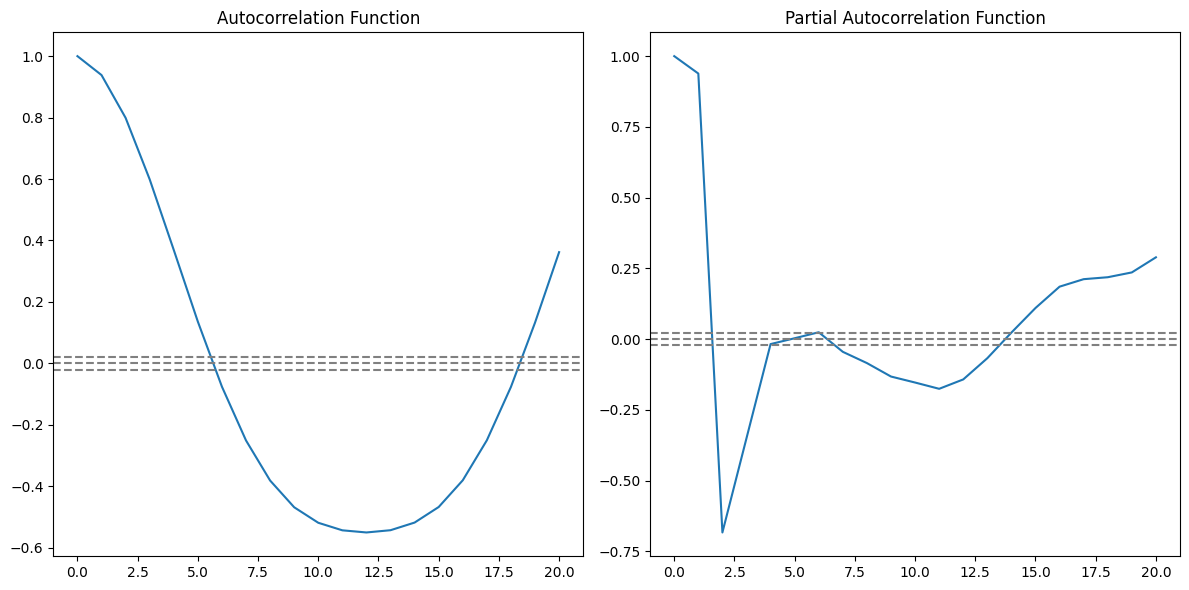

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
import numpy as np
import matplotlib.pyplot as plt



ghi_series_corrected = phoenix_ghi_ts['GHI']

lag_acf = acf(ghi_series_corrected, nlags=20)
lag_pacf = pacf(ghi_series_corrected, nlags=20, method='ols')

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ghi_series_corrected)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ghi_series_corrected)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ghi_series_corrected)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ghi_series_corrected)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()


2119088

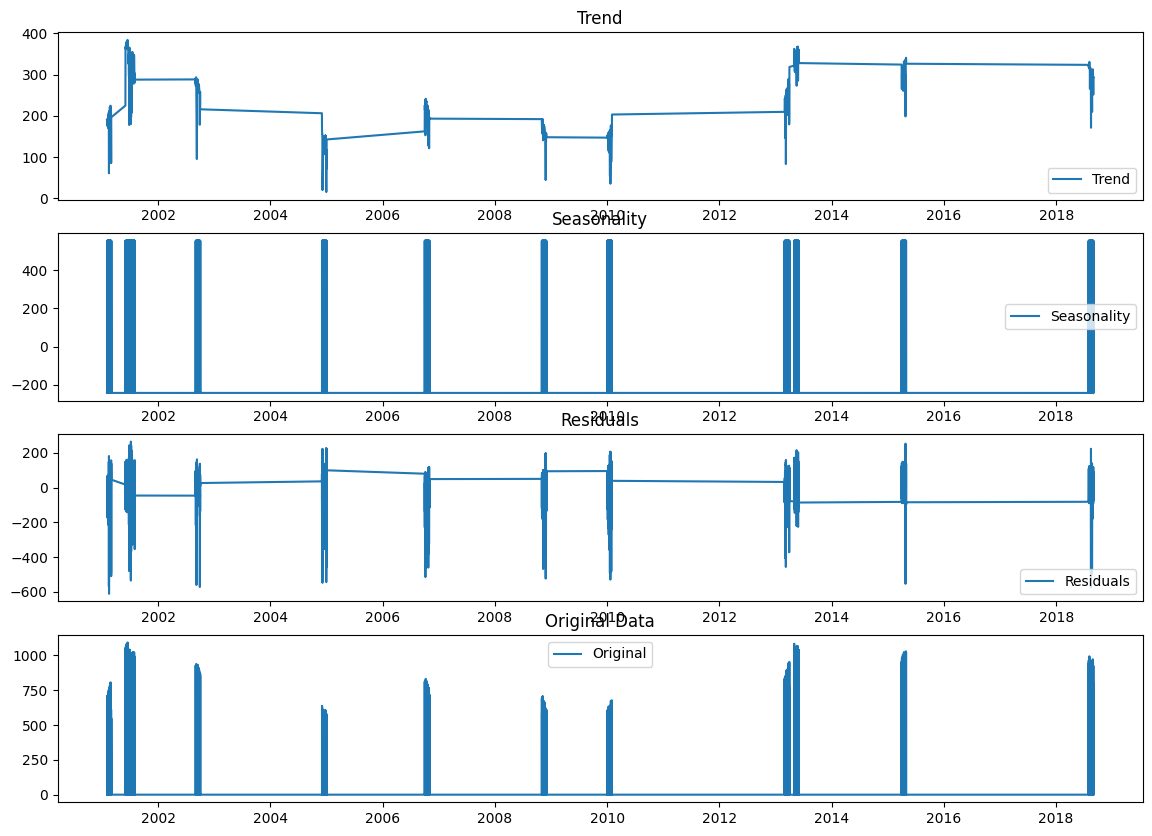

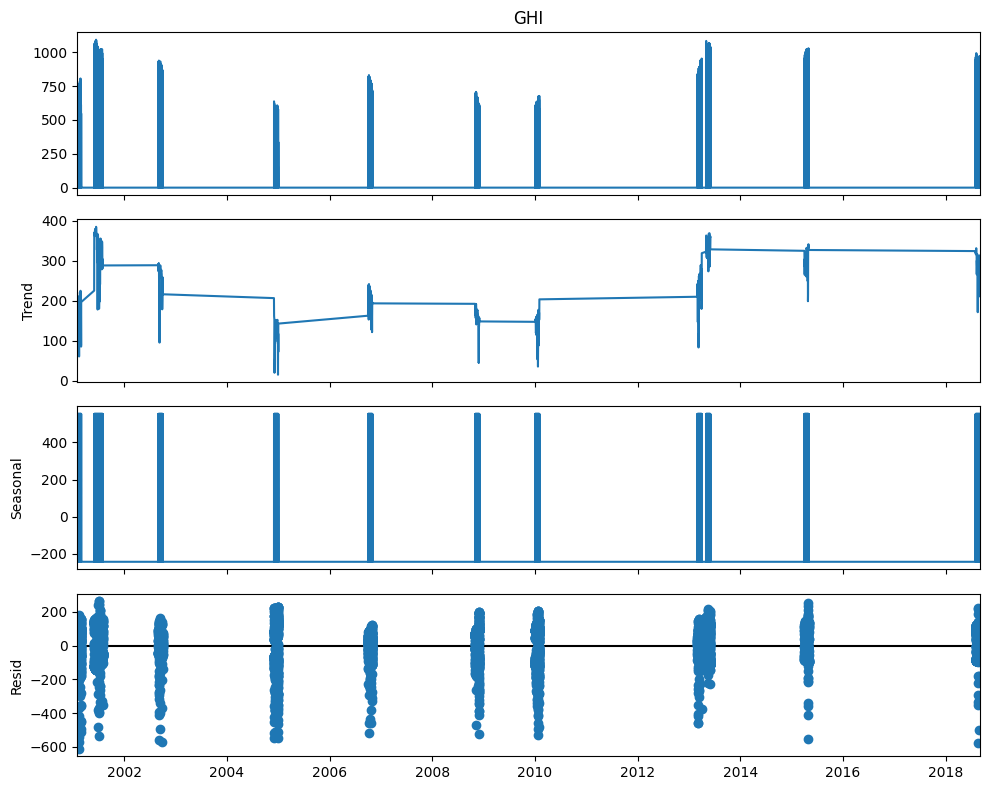

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
ghi_series_sorted = ghi_series_corrected.sort_index()

decomposition_sorted = seasonal_decompose(ghi_series_sorted, model='additive', period=24)

trend = decomposition_sorted.trend
seasonal = decomposition_sorted.seasonal
residual = decomposition_sorted.resid

plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend')
plt.subplot(412)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.title('Seasonality')
plt.subplot(413)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.title('Residuals')
plt.subplot(414)
plt.plot(ghi_series_sorted, label='Original')
plt.legend(loc='best')
plt.title('Original Data')

fig_sorted = decomposition_sorted.plot()
fig_sorted.set_size_inches(10, 8)
plt.tight_layout()
plt.show()

In [ ]:
# File paths
file_path_a = '/content/drive/My Drive/data/test/table_1_17_a.csv'
file_path_b = '/content/drive/My Drive/data/test/table_1_17_b.csv'

# Load data from CSV files
data_a = pd.read_csv(file_path_a, skiprows=5)
data_b = pd.read_csv(file_path_b, skiprows=5)

# Define a list of states in the United States
us_states = [
    'Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont',
    'New Jersey', 'New York', 'Pennsylvania', 'Illinois', 'Indiana', 'Michigan', 'Ohio',
    'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota',
    'South Dakota', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Maryland',
    'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky',
    'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas', 'Arizona',
    'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'California',
    'Oregon', 'Washington', 'Alaska', 'Hawaii'
]

# Filter data for only the United States
data_a_us = data_a[data_a['Census Division\nand State'].isin(us_states)]
data_b_us = data_b[data_b['Census Division\nand State'].isin(us_states)]

# Display the first few rows of each dataset to verify the loading and filtering
print("Data from Table 1.17.A (United States only):")
print(data_a_us.head())

print("\nData from Table 1.17.B (United States only):")
print(data_b_us.head())

Data from Table 1.17.A (United States only):
  Census Division\nand State January 2024 January 2023 Percentage\nChange  \
1                Connecticut           86           77              11.9%   
2                      Maine           82           50              63.5%   
3              Massachusetts          304          303               0.3%   
4              New Hampshire           NM           17                 NM   
5               Rhode Island           70           55              26.9%   

  January 2024.1 January 2023.1 January 2024.2 January 2023.2 January 2024.3  \
1             16             19             69             57              0   
2             29             21             53             29              0   
3            100            106            204            198              4   
4             NM             NM             20             16              0   
5             26             23             44             33              0   

  January 2

In [ ]:
import requests

# Merge the datasets based on a common key (e.g., state name)
merged_data = pd.merge(data_a_us, data_b_us, on='Census Division\nand State', how='inner')

# Function to construct API requests for geocoding
def construct_api_request(address):
    base_url = "https://geocoding.geo.census.gov/geocoder/locations/address"
    benchmark = "Public_AR_Current"  # Adjust benchmark according to your needs
    format_type = "json"  # JSON format response
    address = address.replace(" ", "+")  # Replace spaces with '+' for URL encoding
    api_request = f"{base_url}?address={address}&benchmark={benchmark}&format={format_type}"
    return api_request

# Add STATE FIPS column
new_column = []

for state_name in merged_data['Census Division\nand State']:
    # Construct API request for geocoding
    api_request = construct_api_request(state_name)

    # Send API request
    response = requests.get(api_request).json()

    try:
        # Extract STATE FIPS code from the API response
        state_fips_code = response['result']['addressMatches'][0]['geographies']['States'][0]['STATEFP']
        new_column.append(state_fips_code)
    except KeyError:
        print("Error: STATE FIPS code not found for", state_name)
        new_column.append(None)

# Assign the STATE FIPS column to the merged dataset
merged_data['STATE_FIPS'] = new_column

# Display the merged dataset
print("Merged Data:")
print(merged_data.head())

# Save the merged dataset to a new file
merged_file_path = '/content/drive/My Drive/data/test/merged_data_with_state_fips.csv'
merged_data.to_csv(merged_file_path, index=False)
print("Merged data with STATE FIPS saved to:", merged_file_path)

Error: STATE FIPS code not found for Connecticut
Error: STATE FIPS code not found for Maine
Error: STATE FIPS code not found for Massachusetts
Error: STATE FIPS code not found for New Hampshire
Error: STATE FIPS code not found for Rhode Island
Error: STATE FIPS code not found for Vermont
Error: STATE FIPS code not found for New Jersey
Error: STATE FIPS code not found for New York
Error: STATE FIPS code not found for Pennsylvania
Error: STATE FIPS code not found for Illinois
Error: STATE FIPS code not found for Indiana
Error: STATE FIPS code not found for Michigan
Error: STATE FIPS code not found for Ohio
Error: STATE FIPS code not found for Wisconsin
Error: STATE FIPS code not found for Iowa
Error: STATE FIPS code not found for Kansas
Error: STATE FIPS code not found for Minnesota
Error: STATE FIPS code not found for Missouri
Error: STATE FIPS code not found for Nebraska
Error: STATE FIPS code not found for North Dakota
Error: STATE FIPS code not found for South Dakota
Error: STATE FIP